In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
from scikits.bootstrap import ci
import glob
from IPython.core.display import display

# credit to http://people.duke.edu/~ccc14/pcfb/analysis.html
def bootstrap(data, num_samples, statistic, alpha=0.05):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = np.random.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])


# Artist jump distributions

In [34]:
artist_jump_data = pd.read_table('../foragingAnalysis/MPA/jumpdists',header=None,names=['userid','vals'])
arr = np.array([[int(val) for val in row.split(',')] for row in artist_jump_data['vals']])
arrmean = arr/arr.sum(1,keepdims=True).astype(float)

arr_complete = np.loadtxt('../testData/jumpdists_all',delimiter=',',dtype=int)
arrmean_complete = arr_complete/arr_complete.sum(1,keepdims=True).astype(float)

In [52]:
randhops = np.array([   4342755,    2758453,    2434669,    2270920,    2119710,
          2053161,    1994882,    1959341,    1922705,    1902292,
          1892862,    1877426,    1874080,    1863727,    1855469,
          1848940,    1858326,    1880130,    1885815,    1897211,
          1909684,    1934096,    1953835,    1976156,    2017692,
          2040944,    2055485,    2083535,    2114429,    2150651,
          2194113,    2249135,    2272474,    2325105,    2367550,
          2416719,    2462595,    2521398,    2563528,    2604849,
          2695258,    2756460,    2803823,    2894244,    2966559,
          3045459,    3137227,    3217971,    3304616,    3385290,
          3506161,    3615485,    3728882,    3852841,    3975289,
          4116962,    4259949,    4393680,    4565909,    4735030,
          4915608,    5110211,    5321315,    5547767,    5769740,
          6032796,    6311921,    6592636,    6909131,    7272314,
          7651422,    8037429,    8455876,    8947052,    9463727,
         10038245,   10639356,   11368518,   12177166,   13061866,
         13993453,   15108969,   16321222,   17704845,   19340282,
         21231830,   23451106,   26002318,   29150758,   33027899,
         37755290,   43726509,   51365877,   61696002,   76176436,
         97894469,  133221492,  199900812,  374739922, 4697838987])
randhops = randhops / float(randhops.sum())
randhops_mini = np.load('../testData/100Mrandhops.npy')

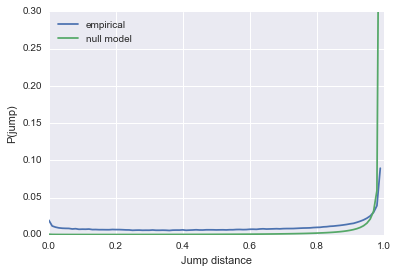

In [47]:
bins = np.arange(0,1.01,0.01)
fig,ax = plt.subplots(1,1)

ax.plot(bins[:-1],np.nanmean(arrmean,0),label='empirical')
ax.plot(bins[:-1],randhops,label='null model')
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump)')
ax.set_ylim(0,0.3)
ax.legend(loc='upper left')

In [54]:
ci_lower = []
ci_upper = []
for i in xrange(arrmean.shape[1]):
    #lower,upper = ci(arrmean[:,i],statfunction=np.nanmean,n_samples=1000)
    lower,upper = bootstrap(arrmean[:,i],statistic=np.nanmean,num_samples=1000)
    ci_lower.append(lower)
    ci_upper.append(upper)
    
ci_lower_ = []
ci_upper = []
for i in xrange(arrmean.shape[1]):
    #lower,upper = ci(arrmean[:,i],statfunction=np.nanmean,n_samples=1000)
    lower,upper = bootstrap(arrmean[:,i],statistic=np.nanmean,num_samples=1000)
    ci_lower.append(lower)
    ci_upper.append(upper)

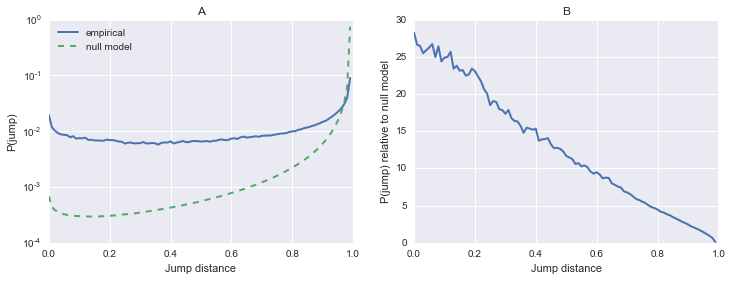

In [70]:
bins = np.arange(0,1.01,0.01)
fig,axes = plt.subplots(1,2,figsize=(12,4))
#ax.plot(bins[:-1],np.nanmean(arrmean,0)/randhops)
ax = axes[0]
ax.plot(bins[:-1],np.nanmean(arrmean,0),label='empirical',lw=2)
ax.plot(bins[:-1],randhops,label='null model',lw=2,ls='--')
#ax.fill_between(bins[:-1],np.array(ci_lower),np.array(ci_upper),alpha=0.5)
ax.set_title('A')
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump)')
#ax.set_ylim(0,0.3)
ax.set_yscale('log')
ax.legend(loc='upper left')


ax = axes[1]
ax.plot(bins[:-1],np.nanmean(arrmean_complete,0)/randhops,lw=2)
#ax.plot(bins[:-1],np.nanmean(arrmean_complete,0)/randhops_mini)
#ax.fill_between(bins[:-1],(np.nanmean(arrmean_complete,0)/randhops)-np.array(ci_lower),(np.nanmean(arrmean_complete,0)/randhops)+np.array(ci_upper),alpha=0.5)
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump) relative to null model')
ax.set_title('B')

# Patch segmentation parameter exploration

In [6]:
df = pd.read_table('../testData/patch_len_dists_concat',header=None,names=['user','method','hist_type','dist','mpl','d'])
df['d'] = df['d'].apply(lambda d: np.array(d.split(','),dtype=float))

# drop garbage user
df = df[df['user']!=6041368]

In [7]:
len(df['user'].unique())

3071

(0, 25)

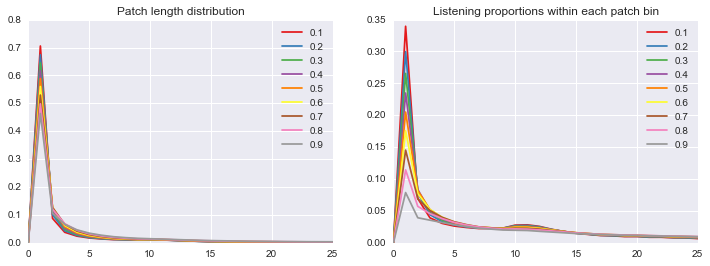

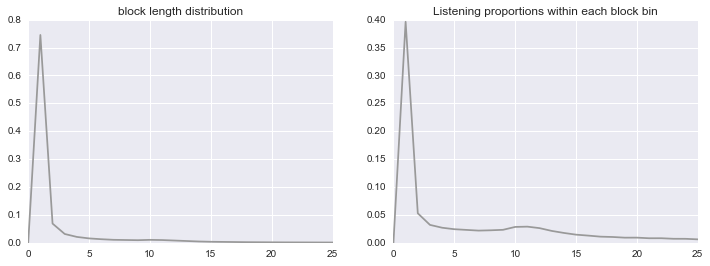

In [246]:
def grouper(df):
    result = np.zeros(1000)
    for d in df['d']:
        d = d.copy()
        
        d =  d/float(d.sum())
        result += d
    return result / float(len(df))

simple_means = df[(df['method']=='simple')&(df['hist_type']=='patches')].groupby('dist').apply(grouper)
fig,axes = plt.subplots(1,2,figsize=(12,4))
colors = seaborn.color_palette('Set1',n_colors=9)
ax = axes[0]
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_title('Patch length distribution')

ax = axes[1]
simple_means = df[(df['method']=='simple')&(df['hist_type']=='listens')].groupby('dist').apply(lambda df: df['d'].mean())
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_title('Listening proportions within each patch bin')

simple_means = df[(df['method']=='block')&(df['hist_type']=='patches')&(df['dist']==0.1)]['d'].apply(lambda x: x/x.sum()).mean()
fig,axes = plt.subplots(1,2,figsize=(12,4))
colors = seaborn.color_palette('Set1',n_colors=9)
ax = axes[0]
ax.plot(simple_means,label=dist,c=colors[i])
ax.set_title('block length distribution')

ax.set_xlim(0,25)
ax = axes[1]
simple_means = df[(df['method']=='block')&(df['hist_type']=='listens')&(df['dist']==0.1)]['d'].mean()

ax.plot(simple_means,label=dist,c=colors[i])
ax.set_title('Listening proportions within each block bin')
ax.set_xlim(0,25)

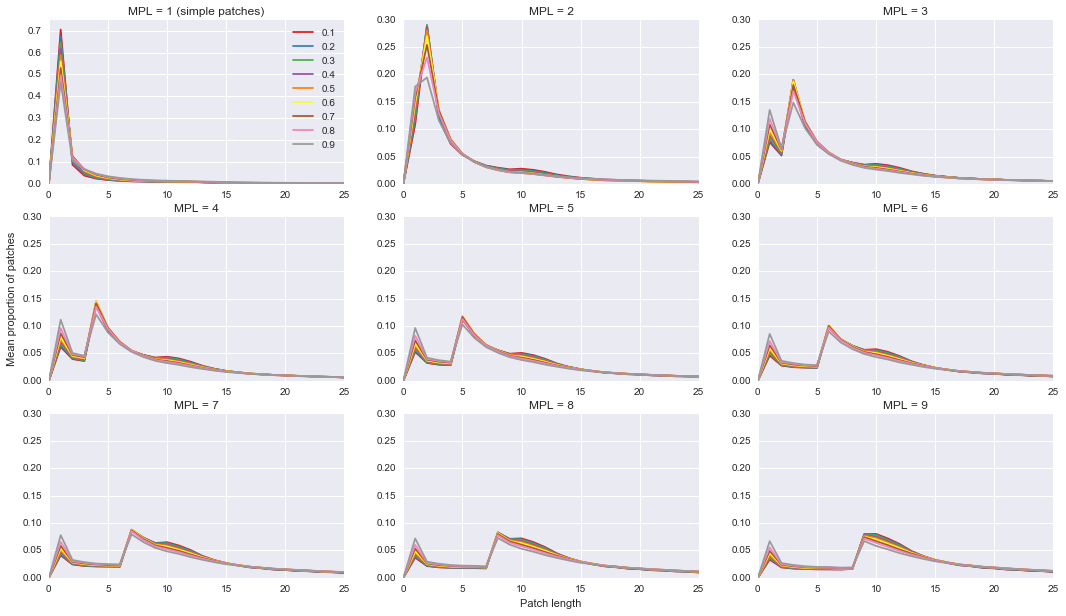

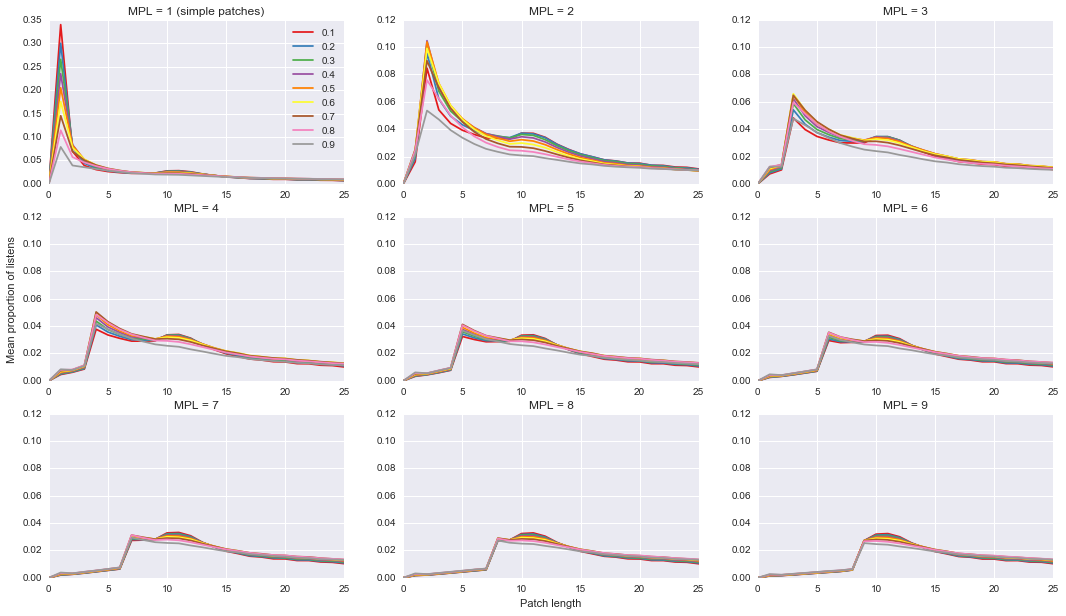

In [256]:
shuffle_means = df[(df['method']=='shuffle')&(df['hist_type']=='patches')].groupby(['dist','mpl']).apply(grouper)
fig,axes = plt.subplots(3,3,figsize=(18,10))
ax_iter = axes.flat
colors = seaborn.color_palette('Set1',n_colors=9)

simple_means = df[(df['method']=='simple')&(df['hist_type']=='patches')].groupby('dist').apply(grouper)
ax = ax_iter.next()
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_ylim(0,0.75)
ax.set_title('MPL = 1 (simple patches)')
# ax.set_xlabel('Patch length')
# ax.set_ylabel('Mean proportion of patches')

for idx,grp in enumerate(sorted(shuffle_means.index.levels[1][:-1])):
    ax = ax_iter.next()
    for i,(dist,d) in enumerate(shuffle_means.xs(grp,level='mpl').iteritems()):
        ax.plot(d,label=dist,c=colors[i])
    #ax.legend()
    ax.set_title('MPL = {}'.format(grp))
    ax.set_xlim(0,25)
    ax.set_ylim(0,0.3)
    if idx == 2:
        ax.set_ylabel('Mean proportion of patches')
    if idx == 6:
        ax.set_xlabel('Patch length')

shuffle_means = df[(df['method']=='shuffle')&(df['hist_type']=='listens')].groupby(['dist','mpl']).apply(grouper)

fig,axes = plt.subplots(3,3,figsize=(18,10))
ax_iter = axes.flat

ax = ax_iter.next()
simple_means = df[(df['method']=='simple')&(df['hist_type']=='listens')].groupby('dist').apply(lambda df: df['d'].mean())
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_title('MPL = 1 (simple patches)')
# ax.set_xlabel('Patch length')
# ax.set_ylabel('Mean proportion of listens')



for idx,grp in enumerate(sorted(shuffle_means.index.levels[1][:-1])):
    ax = ax_iter.next()
    for i,(dist,d) in enumerate(shuffle_means.xs(grp,level='mpl').iteritems()):
        ax.plot(d,label=dist,c=colors[i])
    #ax.legend(loc='upper right')
    ax.set_title('MPL = {}'.format(grp))
    ax.set_xlim(0,25)
    ax.set_ylim(0,0.12)
    if idx == 2:
        ax.set_ylabel('Mean proportion of listens')
    if idx == 6:
        ax.set_xlabel('Patch length')
    

# ARS analysis

In [14]:
df = pd.read_table('../testData/blockdists_concat',header=None,names=['user','basis','d']).drop_duplicates(['user','basis'])
df['d'] = df['d'].apply(lambda s: np.array(s.split(','),dtype=float))

df_random = pd.read_table('../testData/blockdists_random_concat',header=None,names=['user','basis','d']).drop_duplicates(['user','basis'])
df_random['d'] = df_random['d'].apply(lambda s: np.array(s.split(','),dtype=float))

In [5]:
display(df.groupby('basis').count())
display(df_random.groupby('basis').count())

,user,d
basis,,
D,90983,90983
M,85877,85877
W,85922,85922
block,91819,91819
scrobble,91879,91879


,user,d
basis,,
D,9505,9505
M,8980,8980
W,8988,8988
block,9615,9615
scrobble,9721,9721


(1, 100)

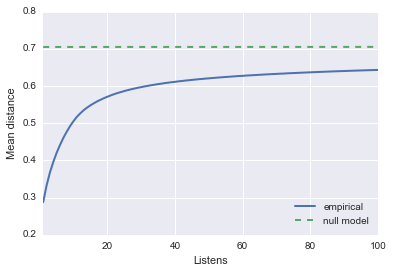

In [9]:
fig,ax = plt.subplots(1,1)
scrobbles = np.nanmean(np.vstack(df[df['basis']=='scrobble']['d'].values),axis=0)
scrobbles_rand = np.nanmean(np.vstack(df_random[df_random['basis']=='scrobble']['d'].values),axis=0)
ax.plot(np.arange(1,101,1),scrobbles,lw=2,label='empirical')
ax.plot(np.arange(1,101,1),scrobbles_rand,lw=2,ls='--',label='null model')
ax.legend(loc='lower right')
ax.set_ylabel('Mean distance')
ax.set_xlabel('Listens')
ax.set_xlim(1,len(scrobbles))

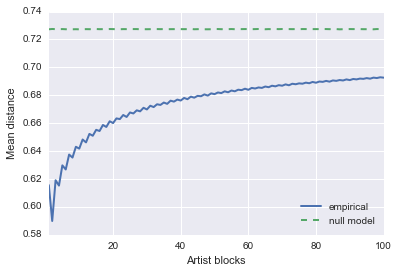

In [11]:
fig,ax = plt.subplots(1,1)
blocks = np.nanmean(np.vstack(df[df['basis']=='block']['d'].values),axis=0)
blocks_rand = np.nanmean(np.vstack(df_random[df_random['basis']=='block']['d'].values),axis=0)
ax.plot(np.arange(1,101,1),blocks,lw=2,label='empirical')
ax.plot(np.arange(1,101,1),blocks_rand,lw=2,ls='--',label='null model')
ax.set_ylabel('Mean distance')
ax.set_xlabel('Artist blocks')
ax.set_xlim(1,len(blocks))
ax.legend(loc='lower right')

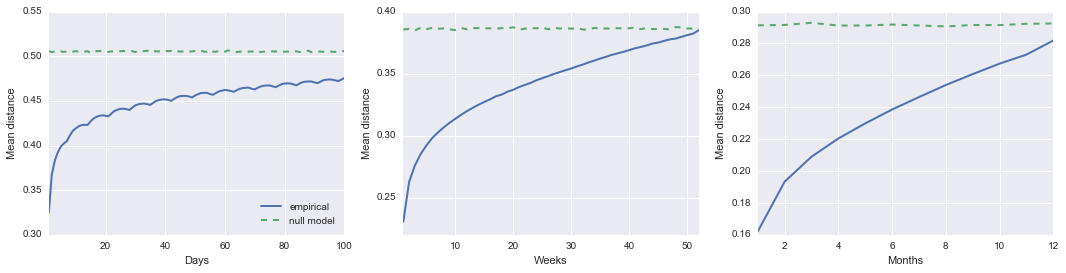

In [17]:
fig,axes = plt.subplots(1,3,figsize=(18,4))
for i,basis in enumerate(['D','W','M']):
    blocks = np.nanmean(np.vstack(df[df['basis']==basis]['d'].values),axis=0)
    blocks_rand = np.nanmean(np.vstack(df_random[df_random['basis']==basis]['d'].values),axis=0)
    ax = axes[i]
    ax.plot(np.arange(1,len(blocks)+1,1),blocks,lw=2,label='empirical')
    ax.plot(np.arange(1,len(blocks_rand)+1,1),blocks_rand,lw=2,label='null model',ls='--')
    ax.set_ylabel('Mean distance')
    ax.set_xlabel({'D':'Days','W':'Weeks','M':'Months'}[basis])
    ax.set_xlim(1,len(blocks))
    if i ==0:
        ax.legend(loc='lower right')
    #ax.set_xticks(np.arange(0,98,7))